<a href="https://colab.research.google.com/github/ValenDiazzz/MachineLearning/blob/main/DecisionTree_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deciion Tree Model Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

plt.style.use("dark_background")

In [ ]:
data= load_breast_cancer(as_frame=True)
X, y, target_names= data['data'], data['target'], data['target_names']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

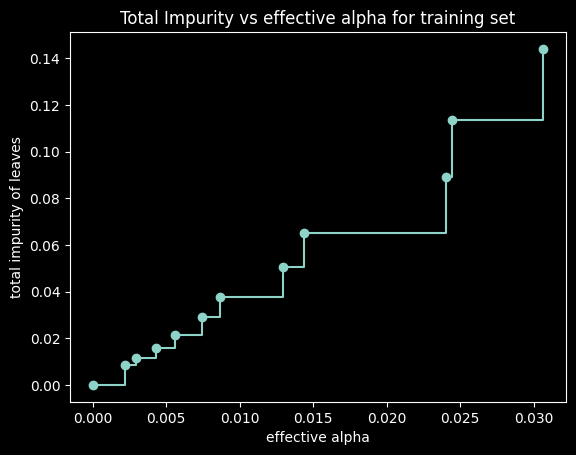

In [ ]:
model= DecisionTreeClassifier()
path= model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)
print(f"Nodes in the last tree: {models[-1].tree_.node_count}, ccp_alpha: {ccp_alphas[-1]}")

Nodes in the last tree: 1, ccp_alpha: 0.32285060033114216


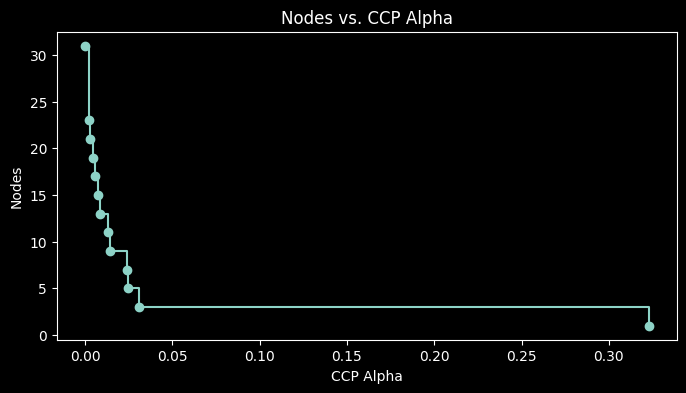

In [ ]:
node_counts = [model.tree_.node_count for model in models]
depth = [model.tree_.max_depth for model in models]

plt.figure(figsize=(8, 4))
plt.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("Nodes")
plt.title("Nodes vs. CCP Alpha")
plt.show()

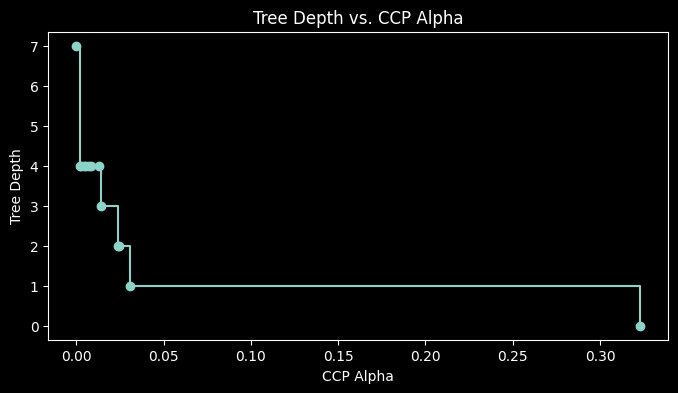

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("Tree Depth")
plt.title("Tree Depth vs. CCP Alpha")
plt.show()

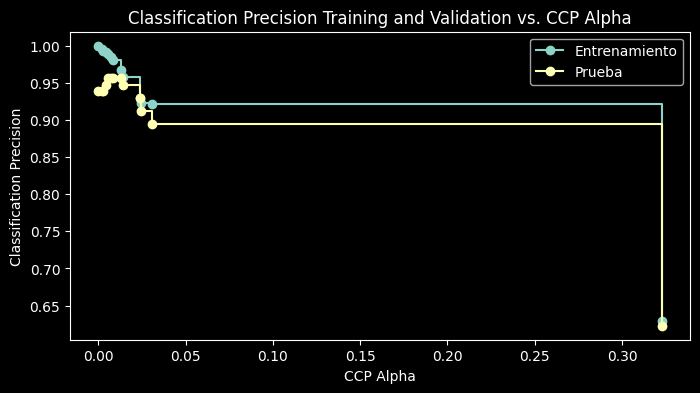

In [ ]:
train_accuracy = [accuracy_score(y_train, model.predict(X_train)) for model in models]
test_accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in models]

plt.figure(figsize=(8, 4))
plt.plot(ccp_alphas, train_accuracy, marker='o', label='Entrenamiento', drawstyle="steps-post")
plt.plot(ccp_alphas, test_accuracy, marker='o', label='Prueba', drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("Classification Precision")
plt.title("Classification Precision Training and Validation vs. CCP Alpha")
plt.legend()
plt.show()